Agenda:
    - correlation
    - linear regression

"Correlation does not imply causation"

Example:

As ice cream sales increase, the rate of drowning deaths increases sharply.
Therefore, ice cream consumption causes drowning.

## 9.1.1 Correlation

When we get data, we want to describe how variables relate to each other. The simplest question we can ask are two variables correlated?

The metric we use for correlation is the Pearson correlation coefficient, which is hard to grasp intuitively from looking at the equation (see https://en.wikipedia.org/wiki/Correlation_and_dependence). Basically, correlation is a measure of how linearly correlated two variables are, and has values between 1 and -1. If the two variables fall on a straight line and the both increase together, then the correlation is 1. If one increases while the other decreases, the correlation is -1. Correlations near zero mean the two variables are not correlated. 

Let's use the movie data we worked with previously to test if budgets and gross earnings are correlated

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
file = "Data/movies.xls"
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

(0, 1000000000.0)

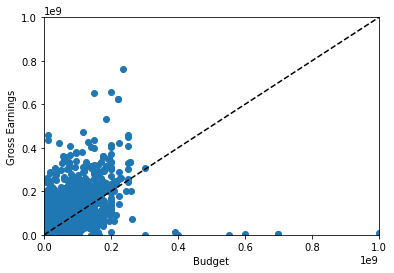

In [4]:
# plot Budget vs Gross Earnings
plt.scatter(movies['Budget'], movies['Gross Earnings'])
plt.plot([0,1E10],[0,1E10], 'k--')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xlim([0,0.1E10])
plt.ylim([0,1E9])

In the above I have added the y=x line to visualize if the gross earnings were above the budget. 
Because many of the data points are on top of each other, it is difficult to assess visually the relationship between the two variables

Note that pandas allows us to get the correlation of the entire dataframe all at once. There are many other packages that will do this as well, including numpy.

In [5]:
movies.corr()
# Budget and Gross earnings are not very correlated, r = 0.10

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Year,1.000000,-0.135038,0.159973,0.045726,0.030886,-0.063820,0.086873,0.101890,0.096137,0.109971,0.218678,0.061504,0.007397,-0.003147,0.275707,-0.209167
Duration,-0.135038,1.000000,-0.090071,0.074276,0.250298,0.173296,0.088449,0.131673,0.123558,0.123074,0.196605,0.013469,0.314765,0.328403,0.258486,0.261662
Aspect Ratio,0.159973,-0.090071,1.000000,0.006598,0.069346,0.001642,-0.020049,-0.007783,-0.003366,-0.017885,0.025737,0.013713,-0.014761,-0.024719,-0.049786,0.059445
Budget,0.045726,0.074276,0.006598,1.000000,0.102179,0.021090,0.022639,0.044236,0.047451,0.036557,0.062039,-0.019559,0.079621,0.084292,0.119994,0.030688
Gross Earnings,0.030886,0.250298,0.069346,0.102179,1.000000,0.144945,0.154468,0.262768,0.308026,0.247400,0.378082,-0.027755,0.637271,0.559958,0.480601,0.198021
Facebook Likes - Director,-0.063820,0.173296,0.001642,0.021090,0.144945,1.000000,0.090707,0.119587,0.120199,0.119532,0.162036,-0.041297,0.297045,0.221890,0.180674,0.170834
Facebook Likes - Actor 1,0.086873,0.088449,-0.020049,0.022639,0.154468,0.090707,1.000000,0.390466,0.249927,0.951660,0.135320,0.072204,0.192763,0.145461,0.190016,0.076153
Facebook Likes - Actor 2,0.101890,0.131673,-0.007783,0.044236,0.262768,0.119587,0.390466,1.000000,0.559662,0.628389,0.243464,0.071177,0.270755,0.219496,0.282306,0.083860
Facebook Likes - Actor 3,0.096137,0.123558,-0.003366,0.047451,0.308026,0.120199,0.249927,0.559662,1.000000,0.473920,0.278844,0.099368,0.287239,0.230189,0.271646,0.052633
Facebook Likes - cast Total,0.109971,0.123074,-0.017885,0.036557,0.247400,0.119532,0.951660,0.628389,0.473920,1.000000,0.209754,0.091410,0.265865,0.206923,0.263203,0.085854


### E1. What does it mean that year and duration are negatively correlated? Plot these two variables togther and explain.

Negative correlation means that duration tends to decrease with year, i.e. over time movies get shorter. The correlation is very weak however.

Text(0, 0.5, 'Duration')

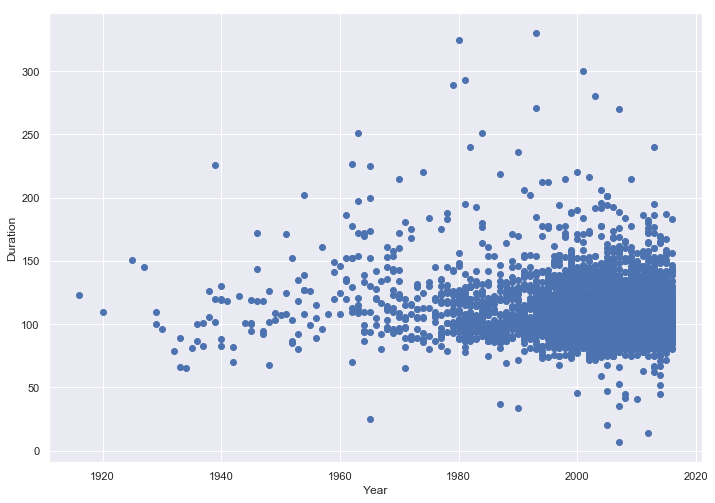

In [82]:
# plot Budget vs Gross Earnings
plt.scatter(movies['Year'], movies['Duration'])
#plt.plot([0,1E10],[0,1E10], 'k--')
plt.xlabel('Year')
plt.ylabel('Duration (minutes)')
#plt.xlim([0,0.1E10])
#plt.ylim([0,1E9])

### E2. Which pairs of variables have the highest correlation? What might explain this?

Facebook likes of the movie and actors in the movie are correlated. As are the number of reviews and facebook likes. Basically, if people like the movie they tend to review it and like the various actors.

## 9.1.2 Linear regression

See https://en.wikipedia.org/wiki/Linear_regression and http://onlinestatbook.com/2/regression/regression.html for a nice introduction

Supposed we were convinced that gross earnings were linearly related to budget, i.e. G = a*B +c. To test this, we would fit the scatterplot we made above to a line, which would solve for the coefficients a (slope) and c (intercept) in our linear equation.

The basic idea of linear regression is that one finds the distance of each data point to a line and minimize this (using calculus) to find the best fit line. This is commonly called ordinary least squares, as the distance of the data from the linear model is squared.

Because the movies database has a number of nans in it, it's a bit difficult to work with. Instead, let's do the tutorial here on linear regression using Boston housing data: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

This tutorial uses the package scikit-learn

In [6]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

What we want to do here is to determine which variables contribute to housing prices

In [84]:
# this is a dictionary like object
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
# information on the data:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
# convert the data set into a pandas data frame  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])


In [10]:
# are room numbers and value correlated?
np.corrcoef(df["RM"], target["MEDV"])

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

Text(0, 0.5, 'House value ($1000s)')

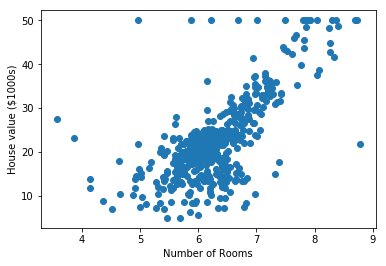

In [11]:
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

### Doing a linear regression using scipy

In [12]:
from scipy import stats

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["RM"],target["MEDV"])

this gives us the slope and intercept of the line, the corrlation (r_value)

A low p-value (< 0.05) indicates that the linear regression is a good model

the standard error is the standard deviation of the data from the model (instead of the mean)

In [16]:
slope

9.102108981180306

In [17]:
intercept

-34.67062077643854

In [18]:
r_value
# note this is the same correlation value we got before

0.695359947071539

In [19]:
p_value
# very small

2.487228871008377e-74

In [20]:
std_err

0.41902656012134054

Text(0, 0.5, 'House value ($1000s)')

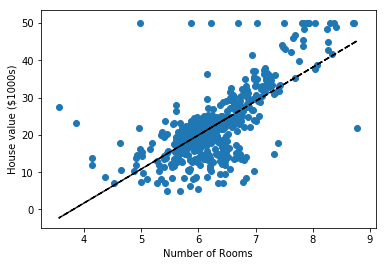

In [21]:
plt.plot(df["RM"], slope*df["RM"]+intercept, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

### Doing a linear regression using statsmodels

See https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

and

https://www.statsmodels.org/dev/index.html

In [22]:
import statsmodels.api as sm

In [23]:
X = df["RM"] # what we think the cost depends on
y = target["MEDV"]

In [24]:
# Note y, the target, goes first:
model = sm.OLS(y, X).fit()

# this is fitting y = aX, with no constant, or rather an intercept of zero

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          3.74e-256
Time:                        23:58:57   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
predictions = model.predict(X) # make the predictions by the model

Text(0, 0.5, 'House value ($1000s)')

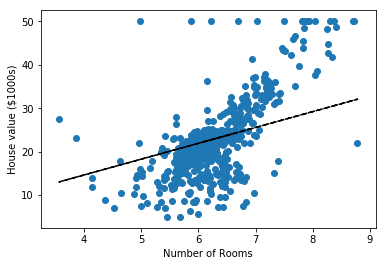

In [27]:
plt.plot(X,predictions, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')
# this is not a very good fit

Note that with statsmodels you can easily do generalized linear regression, i.e. regression with more than one variable: 

y = a*X_1 + b*X_2 + ...

### E3. Do the tutorial: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [28]:
import seaborn as sns 

In [29]:
boston = pd.DataFrame(data.data, columns=data.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
boston['MEDV'] = data.target

In [31]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

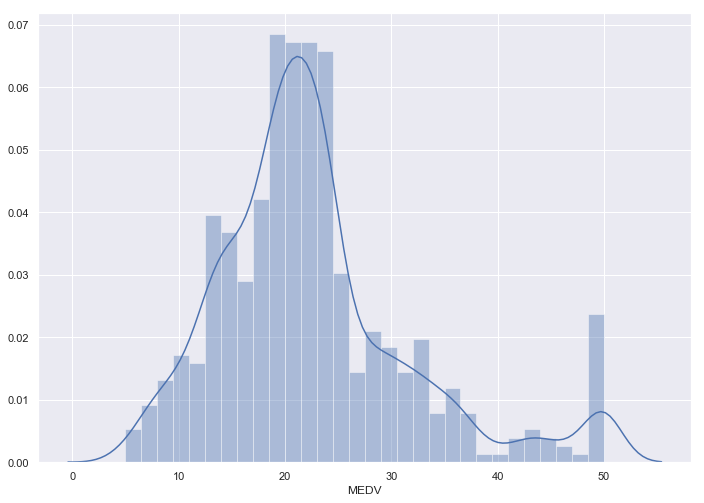

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)

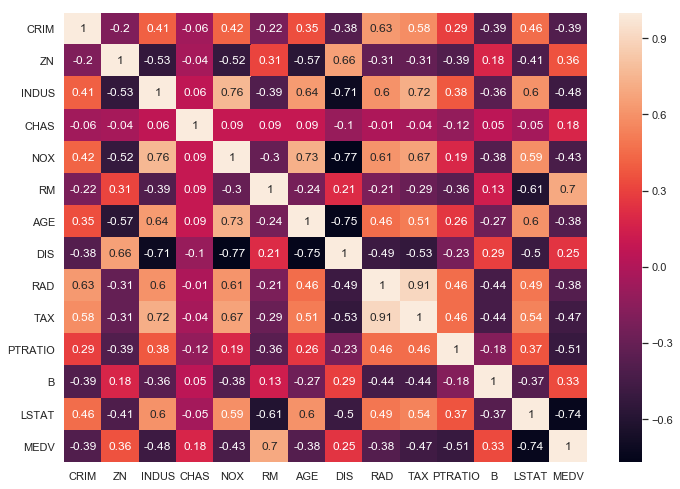

In [35]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [36]:
features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    print(i)
    print(col)

0
LSTAT
1
RM


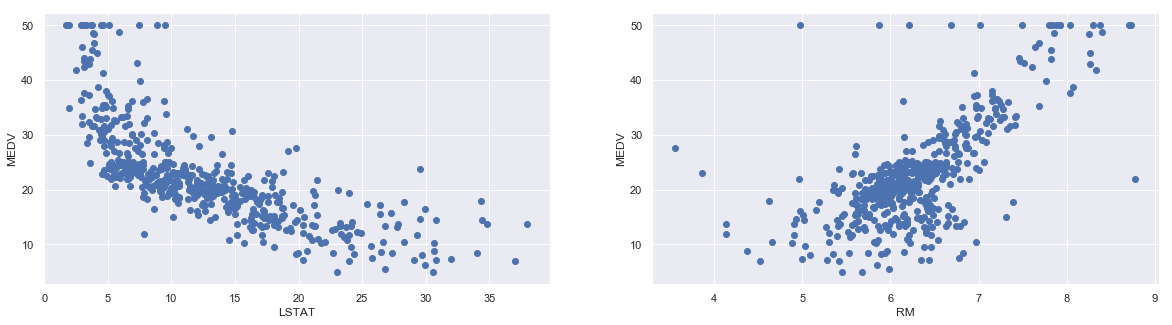

In [39]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    plt.scatter(x, target, marker='o')
    #plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [44]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train) # predict 
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954


### E4. Following the methods in the tutorial above, do the regression with just the rooms and not the other variable. How does this compare with the scipy result?

In [52]:
X2 = pd.DataFrame( boston['RM'], columns = ['RM'])
Y = boston['MEDV']

In [53]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, test_size = 0.2, random_state=5)
print(X2_train.shape)
print(X2_test.shape)
print(Y2_train.shape)
print(Y2_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [55]:
lin_model2 = LinearRegression()
lin_model2.fit(X2_train, Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
# model evaluation for training set
y2_train_predict = lin_model2.predict(X2_train)
rmse2 = (np.sqrt(mean_squared_error(Y2_train, y2_train_predict)))
r2_2 = r2_score(Y2_train, y2_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse2))
print('R2 score is {}'.format(r2_2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.4340897790637215




In [76]:
# model evaluation for testing set
y2_test_predict = lin_model2.predict(X2_test)
rmse = (np.sqrt(mean_squared_error(Y2_test, y2_test_predict)))
r2 = r2_score(Y2_test, y2_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.895963186952216
R2 score is 0.6938399401553497


In [69]:
# printing values
print('Slope:' ,lin_model2.coef_)
print('Intercept:', lin_model2.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [8.82345634]
Intercept: -32.839129906011266
Root mean squared error:  4.895963186952216
R2 score:  0.6938399401553497


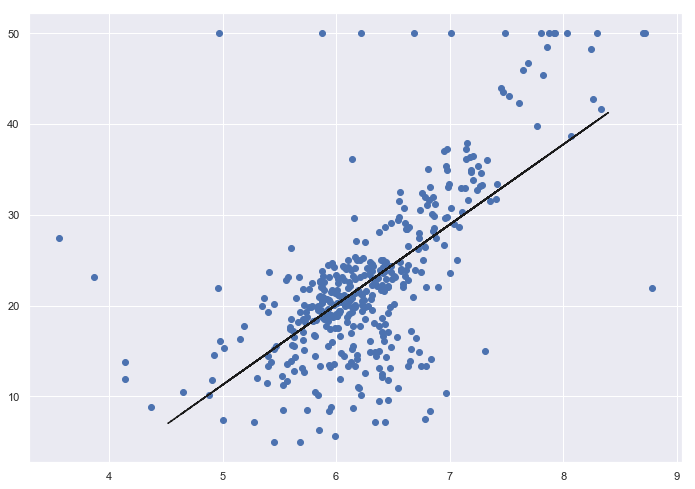

In [70]:
plt.scatter(X2_train,Y2_train)
plt.plot(X2_test,y2_test_predict,'k--')

The slope and intercept are a bit different. However, we are separating the data into a training set and testing set. If all the data are used together the result would be different.

In [66]:
# do the linear regression with just the room data and using all the data

lin_model3 = LinearRegression()
lin_model3.fit(X2, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
y3_predict = lin_model3.predict(X2)
rmse3 = (np.sqrt(mean_squared_error(Y, y3_predict)))
r2_3 = r2_score(Y, y3_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse3))
print('R2 score is {}'.format(r2_3))

The model performance for testing set
--------------------------------------
RMSE is 6.603071389222561
R2 score is 0.48352545599133423


In [77]:
# printing values
print('Slope:' ,lin_model3.coef_)
print('Intercept:', lin_model3.intercept_)
print('Root mean squared error: ', rmse3)
print('R2 score: ', r2_3)

Slope: [9.10210898]
Intercept: -34.67062077643857
Root mean squared error:  6.603071389222561
R2 score:  0.48352545599133423


Note that there is still some difference